In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstan

In [49]:
resize_plot <- function(x,y){ options(repr.plot.width=x, repr.plot.height=y) }

![](./img/9H1.png)

In [3]:
rebuild_cmdstan()

rm -f -r test
rm -f 
rm -f 
rm -f 
rm -f 
  removing dependency files
rm -f src/cmdstan/main.d   stan//src/stan/model/model_header.d
rm -f   
rm -f   
  cleaning sundials targets
rm -f stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_cvodes.a stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_idas.a stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_kinsol.a stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_nvecserial.a stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodea.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodea_io.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodes.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodes_bandpre.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodes_bbdpre.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodes_diag.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodes_direct.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodes_io.o stan/lib/stan_math/lib/sundials_6.1.1/src/cvodes/cvodes_ls.o sta

In [26]:
mp <- map2stan(
    alist(
        a ~ dnorm(0,1),
        b ~ dcauchy(0,1)
    ),
    data=list(y=1),
    start=list(a=0,b=0),
    iter=1e4, warmup=100 , WAIC=FALSE, chains=3, cores=3 )

Running MCMC with 3 parallel chains...

Chain 1 WARNING: There aren't enough warmup iterations to fit the 
Chain 1          three stages of adaptation as currently configured. 
Chain 1          Reducing each adaptation stage to 15%/75%/10% of 
Chain 1          the given number of warmup iterations: 
Chain 1            init_buffer = 15 
Chain 1            adapt_window = 75 
Chain 1            term_buffer = 10 
Chain 1 Iteration:    1 / 10000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 10000 [  1%]  (Warmup) 
Chain 1 Iteration:  101 / 10000 [  1%]  (Sampling) 
Chain 1 Iteration:  200 / 10000 [  2%]  (Sampling) 
Chain 1 Iteration:  300 / 10000 [  3%]  (Sampling) 
Chain 1 Iteration:  400 / 10000 [  4%]  (Sampling) 
Chain 1 Iteration:  500 / 10000 [  5%]  (Sampling) 
Chain 1 Iteration:  600 / 10000 [  6%]  (Sampling) 
Chain 1 Iteration:  700 / 10000 [  7%]  (Sampling) 
Chain 1 Iteration:  800 / 10000 [  8%]  (Sampling) 
Chain 1 Iteration:  900 / 10000 [  9%]  (Sampling) 
Chain 1 Iteration: 

See https://mc-stan.org/misc/warnings for details.




In [144]:
mpu <- ulam(
    alist(
        a ~ dnorm(0,1),
        b ~ dcauchy(0,1),
        c ~ dstudent(nu = 1, 0, 1)
    ),
    data=list(y=1),
    start=list(a=0,b=0,c=0),
    iter=1e4, warmup=100 , chains=3, cores=3 )

Running MCMC with 3 parallel chains...

Chain 1 WARNING: There aren't enough warmup iterations to fit the 
Chain 1          three stages of adaptation as currently configured. 
Chain 1          Reducing each adaptation stage to 15%/75%/10% of 
Chain 1          the given number of warmup iterations: 
Chain 1            init_buffer = 15 
Chain 1            adapt_window = 75 
Chain 1            term_buffer = 10 
Chain 1 Iteration:    1 / 10000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 10000 [  1%]  (Warmup) 
Chain 1 Iteration:  101 / 10000 [  1%]  (Sampling) 
Chain 1 Iteration:  200 / 10000 [  2%]  (Sampling) 
Chain 1 Iteration:  300 / 10000 [  3%]  (Sampling) 
Chain 1 Iteration:  400 / 10000 [  4%]  (Sampling) 
Chain 1 Iteration:  500 / 10000 [  5%]  (Sampling) 
Chain 1 Iteration:  600 / 10000 [  6%]  (Sampling) 
Chain 1 Iteration:  700 / 10000 [  7%]  (Sampling) 
Chain 1 Iteration:  800 / 10000 [  8%]  (Sampling) 
Chain 1 Iteration:  900 / 10000 [  9%]  (Sampling) 
Chain 1 Iteration: 

See https://mc-stan.org/misc/warnings for details.




In [145]:
stancode(mpu)

data{
    int y;
}
parameters{
    real a;
    real b;
    real c;
}
model{
    c ~ student_t( 1 , 0 , 1 );
    b ~ cauchy( 0 , 1 );
    a ~ normal( 0 , 1 );
}



In [146]:
precis(mpu)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.001215514,1.003282,-1.602785,1.605218,28786.1530,1.000076
b,0.205291422,16.168144,-5.141960,5.301531,6170.5197,1.000564
c,1.206913836,179.151651,-5.544538,5.620947,826.1298,1.000033


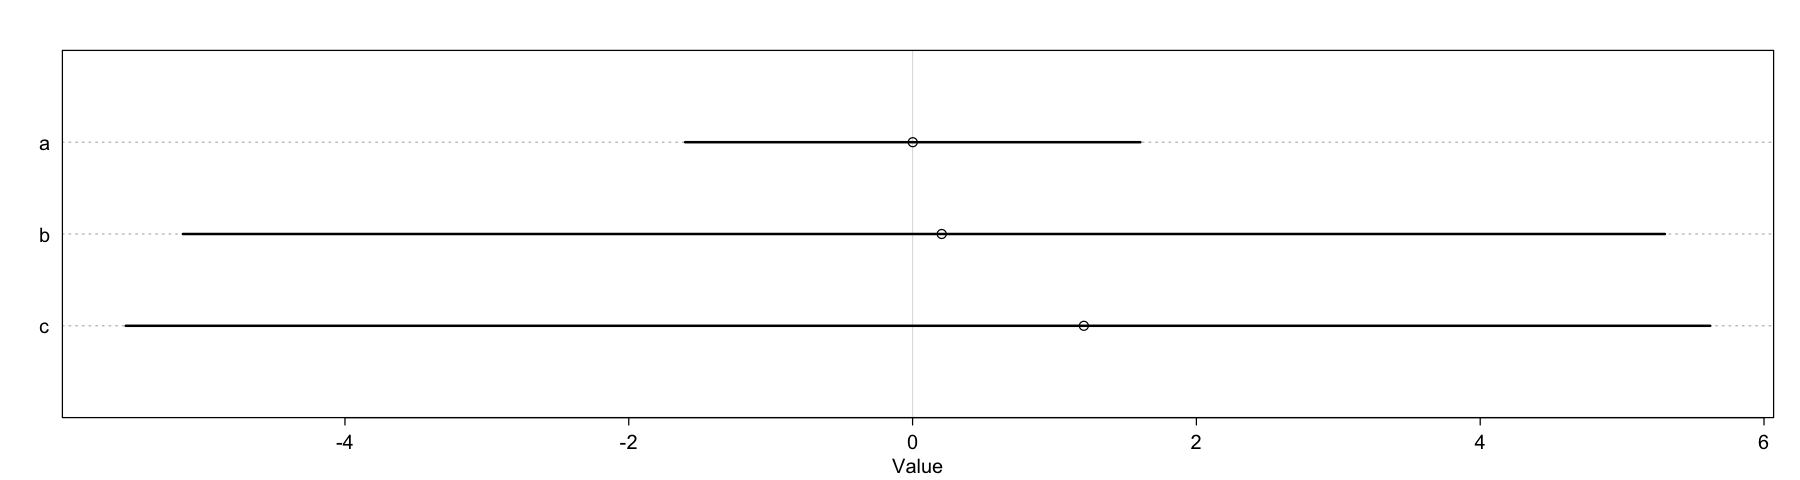

In [147]:
plot(precis(mpu))

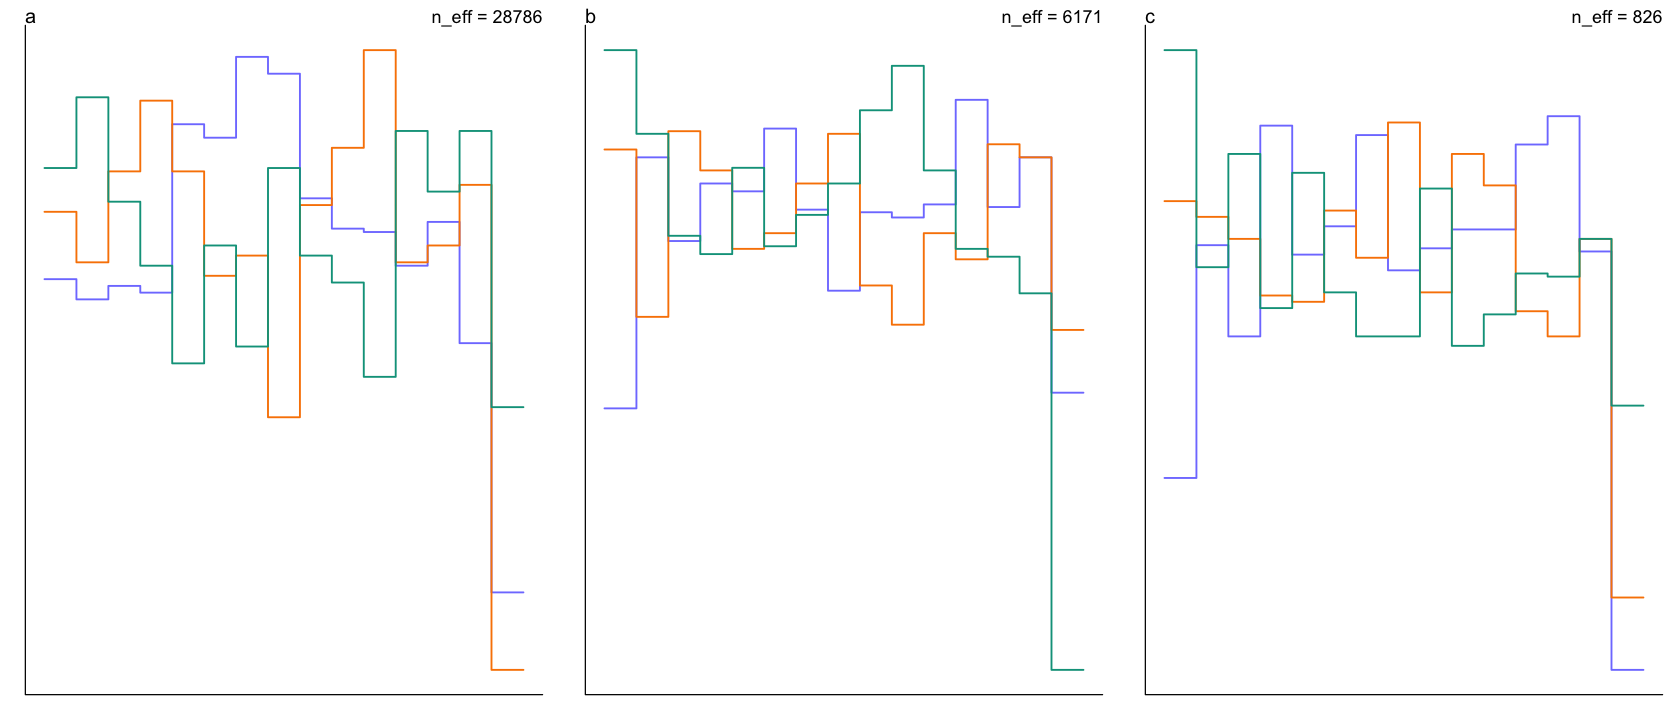

In [148]:
resize_plot(14,6)
trankplot(mpu, bins = 20)

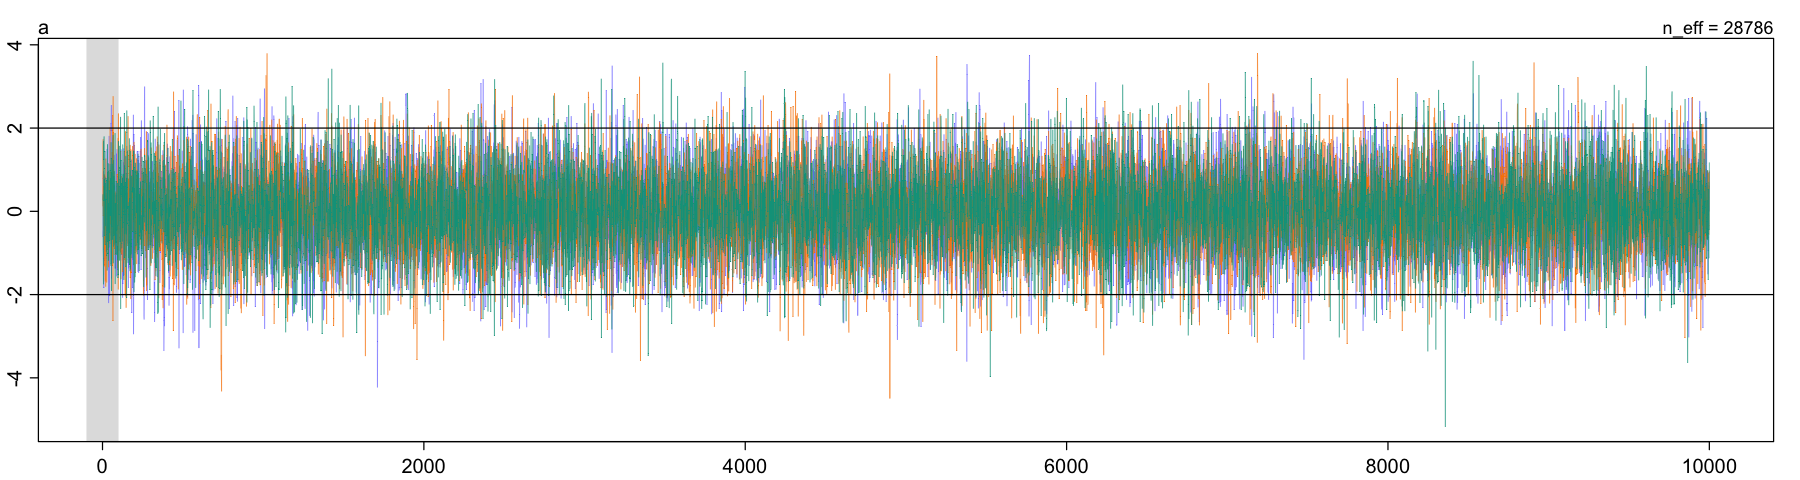

In [149]:
resize_plot(15,4)
traceplot(mpu, pars='a', n_cols=1)
abline(h=c(-2,2), lwd=1)

In [150]:
cat('proportion of values of a in [2,2] from chain 1')
sum(mpu@stanfit@sim$samples[[1]]$a>-2 & mpu@stanfit@sim$samples[[1]]$a<2)/length(mpu@stanfit@sim$samples[[1]]$a)

proportion of values of a in [2,2] from chain 1

[1] 0.9577

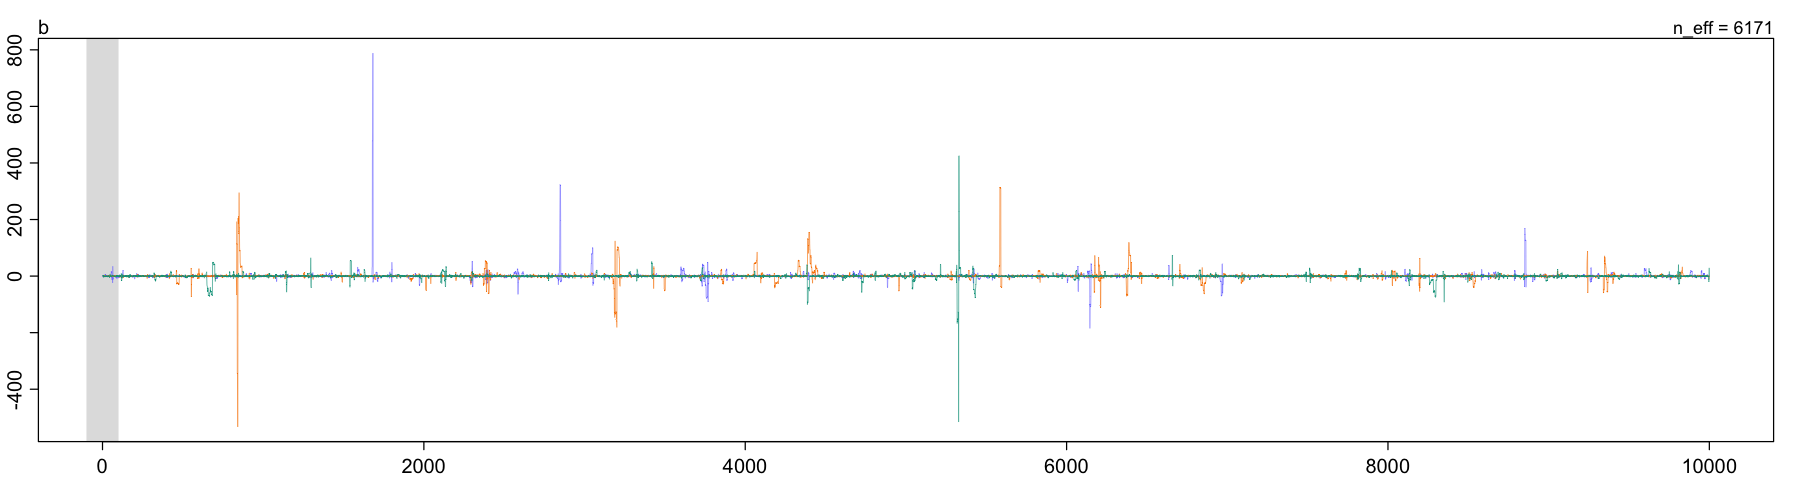

In [151]:
resize_plot(15,4)
traceplot(mpu, pars='b', n_cols=1)

In [152]:
cat('proportion of values of b in [2,2] from chain 1')
sum(mpu@stanfit@sim$samples[[1]]$b>-2 & mpu@stanfit@sim$samples[[1]]$b<2)/length(mpu@stanfit@sim$samples[[1]]$b)

proportion of values of b in [2,2] from chain 1

[1] 0.7232

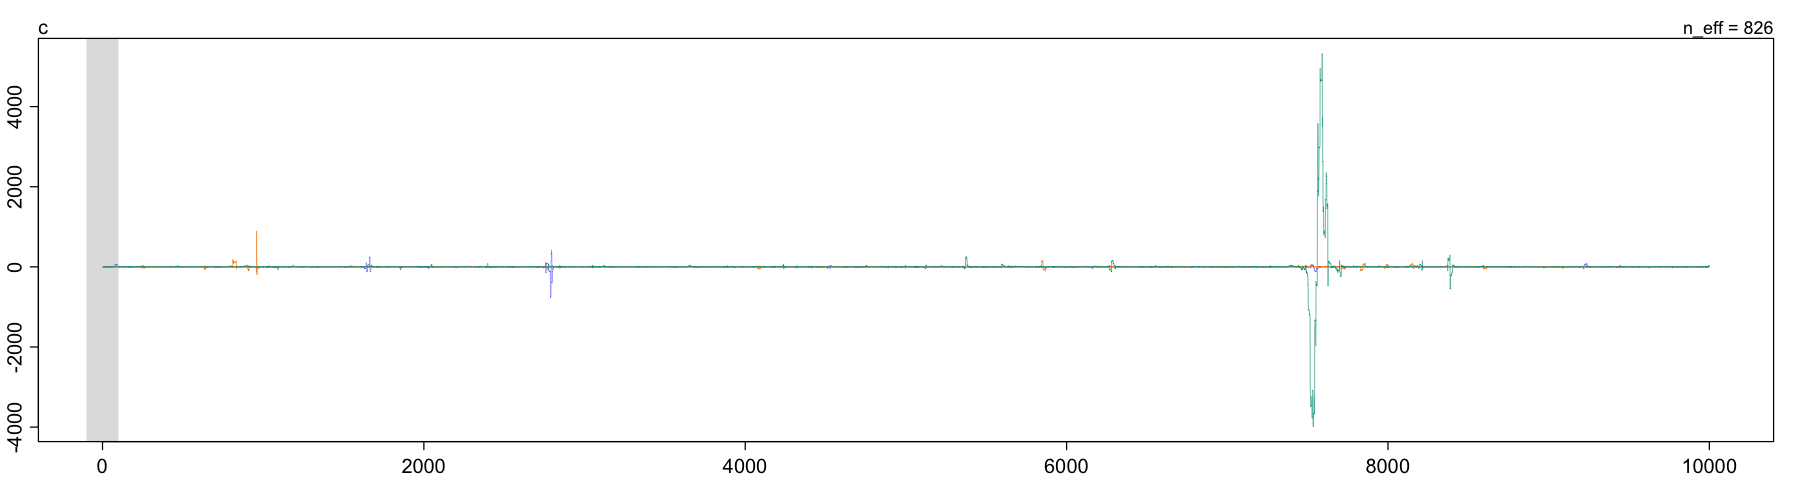

In [154]:
resize_plot(15,4)
traceplot(mpu, pars='c', n_cols=1)

In [153]:
cat('proportion of values of c in [2,2] from chain 1')
sum(mpu@stanfit@sim$samples[[1]]$c>-2 & mpu@stanfit@sim$samples[[1]]$c<2)/length(mpu@stanfit@sim$samples[[1]]$c)

proportion of values of c in [2,2] from chain 1

[1] 0.7191